In [1]:
import networkx as nx
import matplotlib as plt
import tikzplotlib
import pandas as pd

from plot import *


In [2]:
graph_data = pd.read_csv('/mnt/d/Egyetem/Routing Cikk/fast-failover/pearl-algo/topology_zoo_statistics_with_pearl_sizes.csv')
graph_data.sort_values(by = 'NUM PEARLS', axis=0, ascending=False)
#graph_data

,Unnamed: 0,NUM NODES,NUM EDGES,PEARL DEPTH,GRAPH NAME,NUM PEARLS,AVG PEARL SIZE,MIN PEARL SIZE,MAX PEARL SIZE
158,158,754,899,3,Kdl.graphml,12,17.166667,1.0,185.0
55,55,153,191,4,Colt.graphml,11,2.909091,1.0,11.0
54,54,197,245,5,Cogentco.graphml,8,7.875000,1.0,46.0
233,233,158,189,4,UsCarrier.graphml,8,5.000000,1.0,22.0
149,149,125,150,5,Ion.graphml,7,5.571429,1.0,23.0
...,...,...,...,...,...,...,...,...,...
124,124,30,31,1,GtsHungary.graphml,0,0.000000,0.0,0.0
78,78,28,28,1,Gambia.graphml,0,0.000000,0.0,0.0
203,203,37,36,1,Reuna.graphml,0,0.000000,0.0,0.0
119,119,16,15,1,Grena.graphml,0,0.000000,0.0,0.0


In [3]:
subdivision_data = pd.read_csv('/mnt/d/Egyetem/Routing Cikk/fast-failover/pearl-algo/topology_zoo_statistics_subdivision_stats.csv')
subdivision_data


,Unnamed: 0,NUM NODES,NUM EDGES,PEARL DEPTH,GRAPH NAME,NUM PEARLS,AVG PEARL SIZE,MIN PEARL SIZE,MAX PEARL SIZE
0,4,25,30,1,Agis.graphml,1,6.000000,6.0,6.0
1,16,65,79,1,AsnetAm.graphml,3,3.666667,2.0,7.0
2,32,53,65,1,BeyondTheNetwork.graphml,1,14.000000,14.0,14.0
3,37,20,31,1,BtAsiaPac.graphml,1,8.000000,8.0,8.0
4,42,41,59,1,Cernet.graphml,1,8.000000,8.0,8.0
5,47,29,33,1,Cesnet200304.graphml,1,4.000000,4.0,4.0
6,49,39,44,1,Cesnet200603.graphml,1,4.000000,4.0,4.0
7,50,44,51,1,Cesnet200706.graphml,1,6.000000,6.0,6.0
8,51,52,63,1,Cesnet201006.graphml,1,12.000000,12.0,12.0
9,52,42,66,1,Chinanet.graphml,1,9.000000,9.0,9.0


In [4]:
subdivision_graph_num = subdivision_data[subdivision_data['NUM PEARLS'] == 1].shape[0]
subdivision_graph_num


45

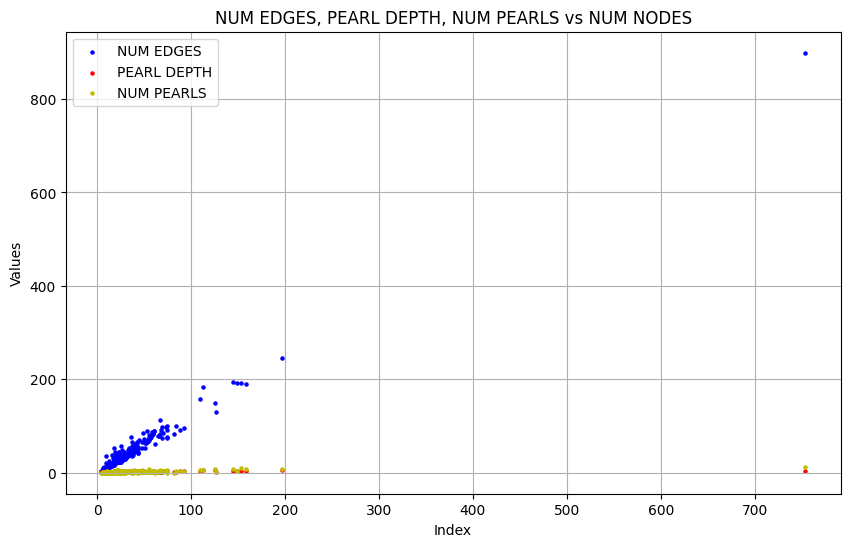

In [5]:
plot_columns_by_an_other_column(graph_data, 'NUM NODES', 'NUM EDGES', 'PEARL DEPTH', 'NUM PEARLS', output_file='topology_zoo_pearl_data.tex')

In [6]:
from pearl_routing import pearl_depth_of_graph, read_in_graph
from plot import draw_graph_with_labels

In [7]:
file_path='/mnt/d/Egyetem/Routing Cikk/SyPeR/topology-zoo-original/Ans.graphml'
#picture_path = '/mnt/d/Egyetem/Routing Cikk/fast-failover/pearl-algo/Aarnet_colored_by_pearls.tex'

In [8]:
G, is_list = read_in_graph(file_path)
print(G.nodes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']


In [9]:
from pearl_routing import *
simple_graph = G

In [10]:
#read in graph 
Graph = nx.MultiGraph(simple_graph)
Graph.graph['root'] = random.choice(list(Graph.nodes))

In [ ]:
Graph.edges

In [11]:


#discard degree 2 nodes, so found pearls are not littered by them
trimmed_graph = Graph.copy()
trimmed_graph = contract_paths_keep_root(trimmed_graph)

#dissect into 2-connected components
comps = cut_cutting_edges(trimmed_graph)
#discard single nodes
proper_comps = [comp for comp in comps if len(comp)>1]
if proper_comps == []:             #if every 2 connected component is a single node, then it is a tree
    print(0,0)
depth_list = []

#measure each component
for comp in proper_comps:
#get the graph structure we need
    graph = trimmed_graph.subgraph(comp).copy()
    #discard degree 2 nodes, so found pearls are not littered by them
    graph = contract_paths_keep_root(graph)
    #if the original root is not in the component, then it is the closest one to the root
    if Graph.graph['root'] not in comp:
        #we need to find the unique closest node to the root
            
        #print('Graph nodes: ', Graph.nodes)
        #print(len(nx.shortest_path(Graph, source='7', target='0')))
        lista = list(comp)
        lista.sort(key= lambda node: len(nx.shortest_path(Graph, source=str(Graph.graph['root']), target=str(node))))
        closest_node = lista[0]
        graph.graph['root'] = closest_node

    #Check those pearls
    depth, num_pearls, graph_with_pearl_data, list_of_all_pearls = partition_2_conn_into_pearls(graph) 
    depth_list.append(depth)


----------------------------------------------------
{'nodes': ['8', '7', '12', '11', '17', '9', '6', '2', '3', '1'], 'id': 0, 'level_of_pearl': 1, 'boundary': 'this is the root', 'cut_edges': 'this is the root', 'neighbor_nodes': 'this is the root', 'parent_pearl': 'this is the root'}


In [12]:
for u, v, data, key in graph.edges(data=True, keys=True):
    # Determine an offset for parallel edges
    edge = (min(u, v), max(u, v))
    print(edge, data, key)

('1', '3') 0 {'LinkType': 'DS-3', 'LinkLabel': '45 Mbps DS-3', 'LinkNote': '45 Mbps ', 'key': 0}
('1', '3') 1 {}
('1', '6') 0 {'LinkType': 'DS-3', 'LinkLabel': '45 Mbps DS-3', 'LinkNote': '45 Mbps ', 'key': 0}
('1', '7') 0 {'LinkType': 'DS-3', 'LinkLabel': '45 Mbps DS-3', 'LinkNote': '45 Mbps ', 'key': 0}
('11', '2') 0 {'LinkType': 'DS-3', 'LinkLabel': '45 Mbps DS-3', 'LinkNote': '45 Mbps ', 'key': 0}
('2', '9') 0 {'LinkType': 'DS-3', 'LinkLabel': '45 Mbps DS-3', 'LinkNote': '45 Mbps ', 'key': 0}
('2', '3') 0 {'LinkType': 'DS-3', 'LinkLabel': '45 Mbps DS-3', 'LinkNote': '45 Mbps ', 'key': 0}
('6', '7') 0 {'LinkType': 'DS-3', 'LinkLabel': '45 Mbps DS-3', 'LinkNote': '45 Mbps ', 'key': 0}
('17', '6') 0 {}
('7', '8') 0 {'LinkType': 'DS-3', 'LinkLabel': '45 Mbps DS-3', 'LinkNote': '45 Mbps ', 'key': 0}
('7', '9') 0 {'LinkType': 'DS-3', 'LinkLabel': '45 Mbps DS-3', 'LinkNote': '45 Mbps ', 'key': 0}
('8', '9') 0 {'LinkType': 'DS-3', 'LinkLabel': '45 Mbps DS-3', 'LinkNote': '45 Mbps ', 'key':

In [13]:
nx.degree(graph, ['3'])

MultiDegreeView({'3': 3})

In [14]:
graph = Graph

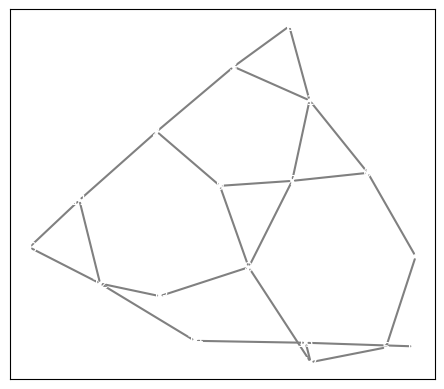

In [15]:
#draw_multigraph_with_labels(graph, picture_path)
draw_multigraph_with_labels(graph)

In [16]:
gmlGraph = nx.read_gml('/mnt/d/Egyetem/Routing Cikk/fast-failover/pearl-algo/graph_sets/200_nodes_by_Arash.gml', label = None)

In [17]:
gmlGraph.nodes

NodeView((0, 1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 16, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [18]:
graph = nx.read_graphml(path = '/mnt/d/Egyetem/Routing Cikk/fast-failover/pearl-algo/graph_sets/topology-zoo-original/Kreonet.graphml')
graph

In [19]:
node_dict = {}
R = {}
f = {}
f['traversing'] = 0

R['f'] = f

node_dict['R'] = R

node_dict

{'R': {'f': {'traversing': 0}}}

In [20]:
R = {}
f2 = {}
f2['getting_out'] = 'we are going'

R['f2'] = f2

if 'R' not in node_dict.keys():
    node_dict['R'] = R
else: 
    node_dict['R']['getting_out'] = 'we are going'

In [21]:
G = nx.MultiGraph([(1,3,0)])
G.add_edge(0,0)
G.add_edge(0,0)
G.add_edge(0,0)
G.degree(0)


6